In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [49]:
class DiabetesDataSet(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter = ',', dtype = np.float32)
        self.len = len(xy)
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [50]:
dataset = DiabetesDataSet('diabetes.csv.gz')

In [51]:
train_loader = DataLoader(dataset = dataset, batch_size = 32, shuffle = True, num_workers = 0)

In [52]:
for f, l in dataset:
    print('特征为:{},所对应的标签为:{}'.format(f.data, l))

特征为:tensor([-0.2941,  0.4874,  0.1803, -0.2929,  0.0000,  0.0015, -0.5312, -0.0333]),所对应的标签为:tensor([0.])
特征为:tensor([-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667]),所对应的标签为:tensor([1.])
特征为:tensor([-0.0588,  0.8392,  0.0492,  0.0000,  0.0000, -0.3055, -0.4927, -0.6333]),所对应的标签为:tensor([0.])
特征为:tensor([-0.8824, -0.1055,  0.0820, -0.5354, -0.7778, -0.1624, -0.9240,  0.0000]),所对应的标签为:tensor([1.])
特征为:tensor([ 0.0000,  0.3769, -0.3443, -0.2929, -0.6028,  0.2846,  0.8873, -0.6000]),所对应的标签为:tensor([0.])
特征为:tensor([-0.4118,  0.1658,  0.2131,  0.0000,  0.0000, -0.2370, -0.8950, -0.7000]),所对应的标签为:tensor([1.])
特征为:tensor([-0.6471, -0.2161, -0.1803, -0.3535, -0.7920, -0.0760, -0.8548, -0.8333]),所对应的标签为:tensor([0.])
特征为:tensor([ 0.1765,  0.1558,  0.0000,  0.0000,  0.0000,  0.0522, -0.9522, -0.7333]),所对应的标签为:tensor([1.])
特征为:tensor([-0.7647,  0.9799,  0.1475, -0.0909,  0.2837, -0.0909, -0.9317,  0.0667]),所对应的标签为:tensor([0.])
特征为:tensor([-0.0588,  0.2563,  0.5738,  0.0000

In [53]:
for i, date in enumerate(train_loader):
    print('第{}个数据,所对应的数据是{},且每个数据集的mini-batch为{}'.format(i, date, len(date[0])))

第0个数据,所对应的数据是[tensor([[-0.0588,  0.6784,  0.7377, -0.0707, -0.4539,  0.1207, -0.9257, -0.2667],
        [-0.8824, -0.1256, -0.0164, -0.2525, -0.8227,  0.1088, -0.6319, -0.9667],
        [ 0.0000,  0.0251,  0.2787, -0.1919, -0.7872,  0.0283, -0.8634, -0.9000],
        [-0.2941,  0.3467,  0.3115, -0.2525, -0.1253,  0.3770, -0.8634, -0.1667],
        [ 0.5294,  0.5879,  0.8689,  0.0000,  0.0000,  0.2608, -0.8471, -0.2333],
        [-0.5294, -0.0251, -0.0164, -0.5354,  0.0000, -0.1595, -0.6883, -0.9667],
        [-0.6471,  0.1156, -0.0492, -0.3737, -0.8960, -0.1207, -0.6994, -0.9667],
        [-0.7647,  0.2261, -0.0164, -0.6364, -0.7494, -0.1118, -0.4543, -0.9667],
        [-0.4118,  0.4774,  0.2787,  0.0000,  0.0000,  0.0045, -0.8804,  0.4667],
        [-0.2941,  0.6683,  0.2131,  0.0000,  0.0000, -0.2072, -0.8070,  0.5000],
        [-0.8824,  0.4372,  0.3770, -0.5354, -0.2671,  0.2638, -0.1477, -0.9667],
        [-0.5294,  0.4673,  0.3934, -0.4545, -0.7636, -0.1386, -0.9052, -0.8000],
  

In [65]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(8, 6)
        self.linear2 = nn.Linear(6, 4)
        self.linear3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()

In [66]:
model

Model(
  (linear1): Linear(in_features=8, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [67]:
criterion = nn.BCELoss(size_average = False) # size_average = False
criterion

D:\anconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


BCELoss()

In [68]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [69]:
#if __name__ == 'main':
#loss_list = []
#epoch_list = []
epoch_loss_dict =  {}
for epoch in range(1000):
    epoch_loss_dict[epoch] = []
    for i, date in enumerate(train_loader):
        input, labels = date
        y_pred = model(input)
        loss = criterion(y_pred, labels)
        #loss_list.append(loss)
        epoch_loss_dict[epoch].append(loss)
        print('Epoch = ', epoch, 'Loss = ', loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #epoch_list.append(epoch)
print('结束!')

Epoch =  0 Loss =  27.260278701782227
Epoch =  0 Loss =  19.377317428588867
Epoch =  0 Loss =  21.702011108398438
Epoch =  0 Loss =  19.659597396850586
Epoch =  0 Loss =  23.252077102661133
Epoch =  0 Loss =  22.306777954101562
Epoch =  0 Loss =  21.931446075439453
Epoch =  0 Loss =  22.10165786743164
Epoch =  0 Loss =  19.61514663696289
Epoch =  0 Loss =  18.051301956176758
Epoch =  0 Loss =  24.614824295043945
Epoch =  0 Loss =  21.666271209716797
Epoch =  0 Loss =  27.095203399658203
Epoch =  0 Loss =  22.544757843017578
Epoch =  0 Loss =  25.14809799194336
Epoch =  0 Loss =  22.351274490356445
Epoch =  0 Loss =  21.504186630249023
Epoch =  0 Loss =  28.28488540649414
Epoch =  0 Loss =  23.714073181152344
Epoch =  0 Loss =  22.905292510986328
Epoch =  0 Loss =  22.00923728942871
Epoch =  0 Loss =  21.681699752807617
Epoch =  0 Loss =  19.702011108398438
Epoch =  0 Loss =  11.110976219177246
Epoch =  1 Loss =  20.778486251831055
Epoch =  1 Loss =  18.147457122802734
Epoch =  1 Loss =

In [74]:
loss_list = []
epoch_list = []
for key, value in epoch_loss_dict.items():
    epoch_list.append(key)
    loss_list.append(float(np.sum(value)) / len(value))

In [75]:
len(loss_list), len(epoch_list)

(1000, 1000)

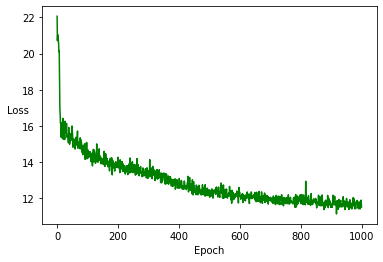

In [77]:
plt.plot(epoch_list, loss_list, c = 'g')
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.show()